In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import SeaIceDrift helper class
from sea_ice_drift import SeaIceDrift

In [2]:
# set names of files
f1 = 'S1B_EW_GRDM_1SDH_20200123T120618.tif'
f2 = 'S1B_EW_GRDM_1SDH_20200125T114955.tif'
# create SeaIceDrift object
sid = SeaIceDrift(f1, f2)

/src/sea_ice_drift/lib.py:43: RuntimeWarning: invalid value encountered in less
  uint8Image[uint8Image < 1] = 1
/src/sea_ice_drift/lib.py:44: RuntimeWarning: invalid value encountered in greater
  uint8Image[uint8Image > 255] = 255


In [3]:
# run Feature Tracking
uft, vft, lon1ft, lat1ft, lon2ft, lat2ft = sid.get_drift_FT()

ORB detector initiated
Key points found: 12616
ORB detector initiated
Key points found: 10952
Domain filter: 12616 -> 12570
Domain filter: 10952 -> 10723
Keypoints matched 1.0046977996826172
Ratio test 0.700000 found 1221 keypoints
MaxDrift filter: 1221 -> 1221
LSTSQ filter: 1221 -> 1220


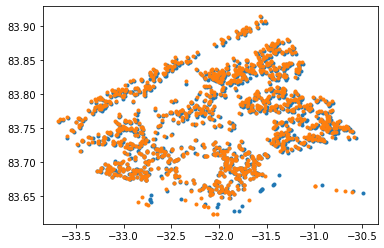

In [4]:
# plot identified and matched keypoints
plt.plot(lon1ft, lat1ft, '.')
plt.plot(lon2ft, lat2ft, '.')

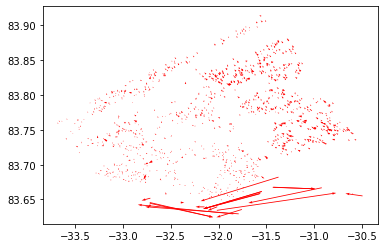

In [5]:
# plot ice drift vectors calculated from the keypoints
plt.quiver(lon1ft, lat1ft, uft, vft, color='r',
           angles='xy', scale_units='xy', scale=1)

Text(0.5, 1.0, 'Latitude grid')

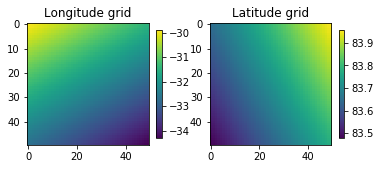

In [6]:
# create longitude and latitude grids at satellite projection
step = 10
lon1pm, lat1pm = sid.n1.get_geolocation_grids(stepSize=step)
plt.subplot(1,2,1);plt.imshow(lon1pm);plt.colorbar(shrink=0.5);plt.title('Longitude grid')
plt.subplot(1,2,2);plt.imshow(lat1pm);plt.colorbar(shrink=0.5);plt.title('Latitude grid')

In [7]:
# run pattern matching
upm, vpm, apm, rpm, hpm, lon2pm, lat2pm = sid.get_drift_PM(
                                    lon1pm, lat1pm,
                                    lon1ft, lat1ft,
                                    lon2ft, lat2ft)


 Pattern matching - OK! (  1 sec)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


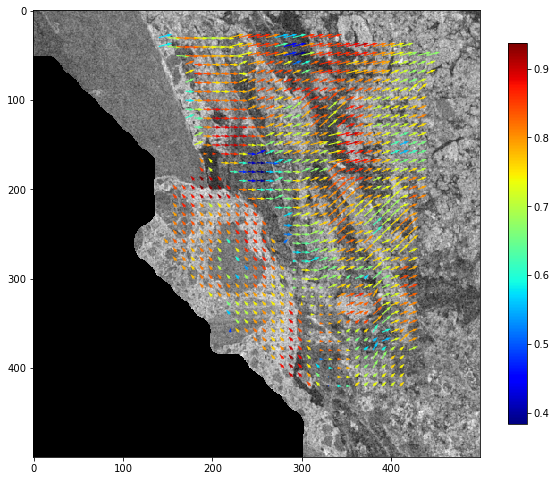

In [8]:
# plot results of pattern matching

# find cells with correlation over 0.4
gpi = hpm*rpm > 4

# convert lon/lat into cartesian coordinates (only valid)
x1pm, y1pm = sid.n1.transform_points(lon1pm[gpi], lat1pm[gpi], DstToSrc=1)
x2pm, y2pm = sid.n1.transform_points(lon2pm[gpi], lat2pm[gpi], DstToSrc=1)

# compute ice drift speed in cartesian coordinates
dx_pm = x2pm - x1pm
dy_pm = y2pm - y1pm

# plot vectors of sea ice drift from Feature Tracking, color by MCC
plt.figure(figsize=(10,10))
plt.imshow(sid.n1[1], cmap='gray')
plt.quiver(x1pm, y1pm, dx_pm, dy_pm, rpm[gpi],
           angles='xy', scale_units='xy', scale=0.2, cmap='jet')
plt.colorbar(shrink=0.7)